In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

Познакомимся с данными.

In [3]:
data = pd.read_excel('Курсовая.xlsx')
data.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [8]:
data.describe()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,500.000000,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,289.108111,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.000000,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,250.000000,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,500.000000,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,750.000000,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1000.000000,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


Данные выглядят довольно разбросанными. Вероятно, придется применять логарифмирование для целевых переменных. Также сразу видно, что столбец Unnamed: 0 не несете в себе никакой важной информации - это только индексы.

In [11]:
data.dtypes

Unnamed: 0             int64
IC50, mM             float64
CC50, mM             float64
SI                   float64
MaxAbsEStateIndex    float64
                      ...   
fr_thiazole            int64
fr_thiocyan            int64
fr_thiophene           int64
fr_unbrch_alkane       int64
fr_urea                int64
Length: 214, dtype: object

In [13]:
data.shape

(1001, 214)

Проверим данные на аномалии: выбросы, дубликаты, пропущенные значения.

In [17]:
print(data.isna().sum())

Unnamed: 0           0
IC50, mM             0
CC50, mM             0
SI                   0
MaxAbsEStateIndex    0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 214, dtype: int64


In [19]:
data = data.drop_duplicates()

In [21]:
un_feats = data.nunique() #удалим столбцы с однм одинаковым значением
data = data.drop(columns=un_feats[un_feats == 1].index)

In [23]:
data = data.drop(columns = ['Unnamed: 0'])

In [25]:
data = data.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x) #заполним пропуски средним по столбцу

<Axes: >

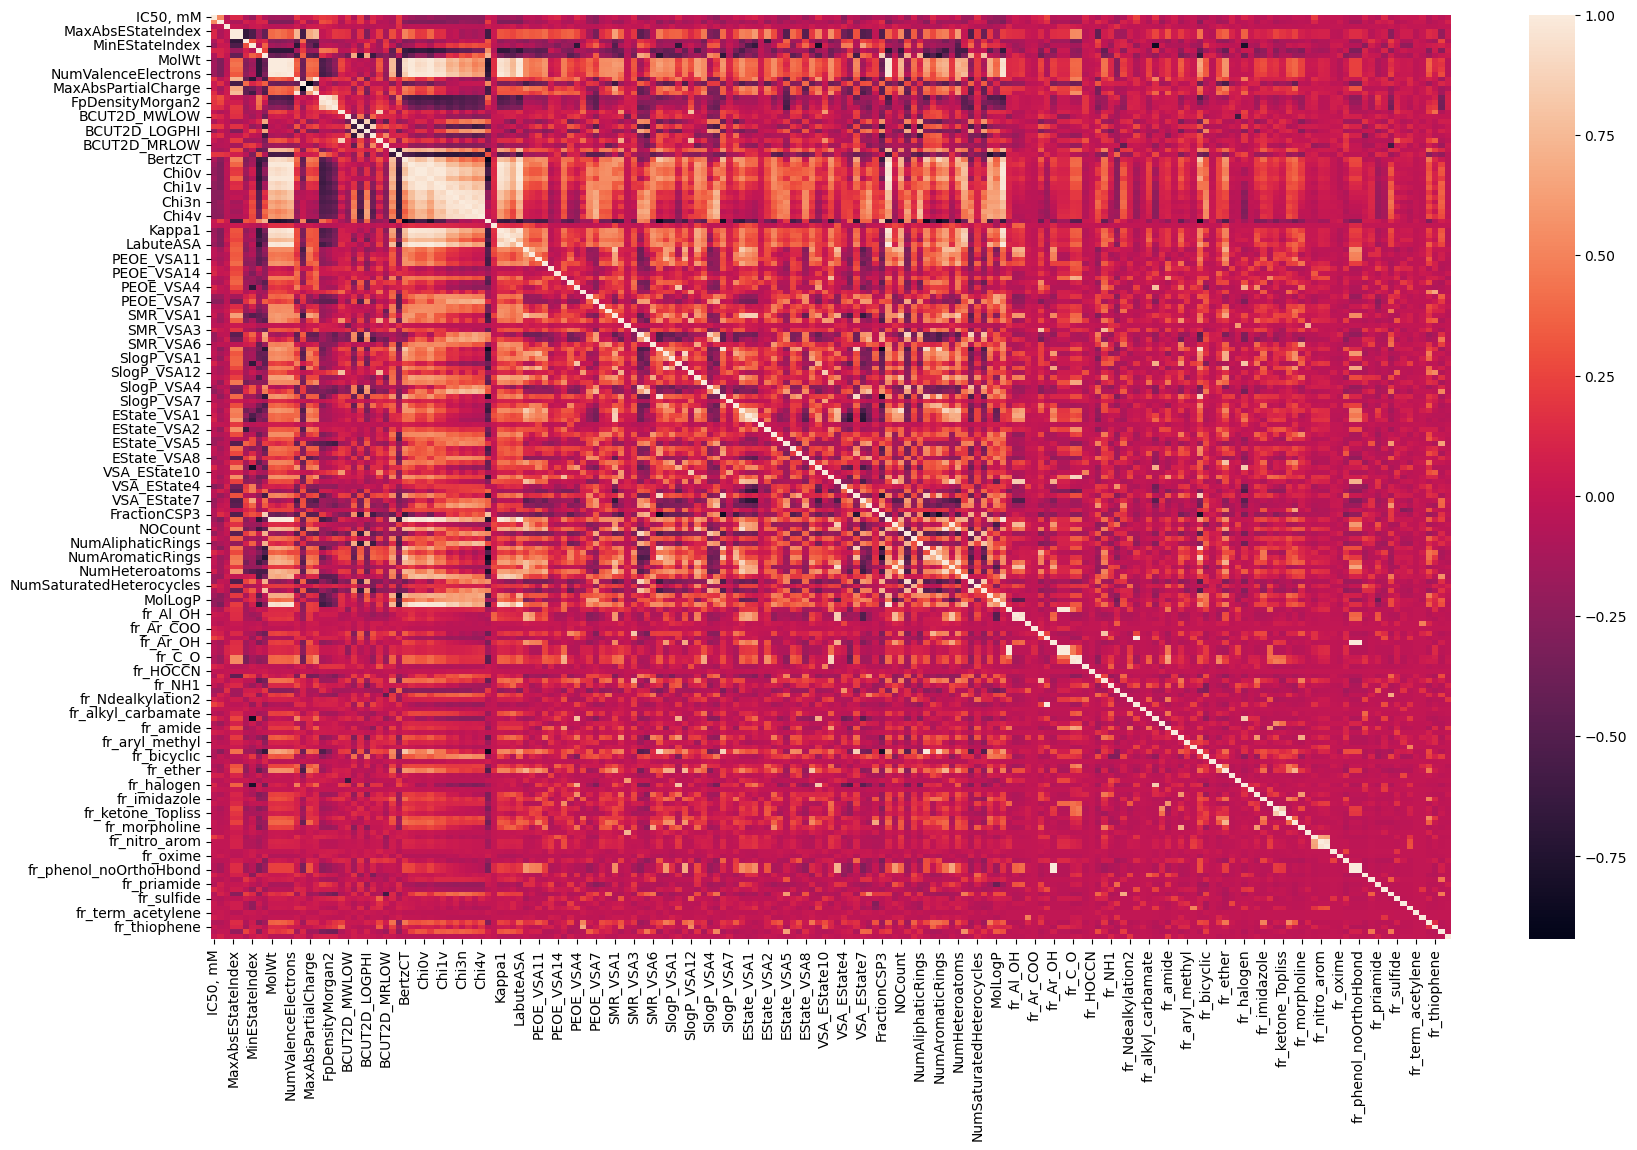

In [27]:
plt.figure(figsize = (20, 12))
sns.heatmap(data.corr(), annot = False)

Внешне тепловая карта корреляции выглядит довольно сумбурно, однако можно заметить, что в ней есть признаки с отрицательной корреляцией - нам придется выбирать подходящие признаки для каждой из поставленных задач.

Проверим распределение данных в наших целевых переменных.

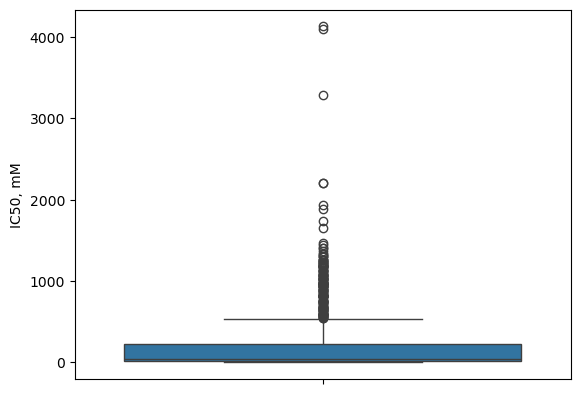

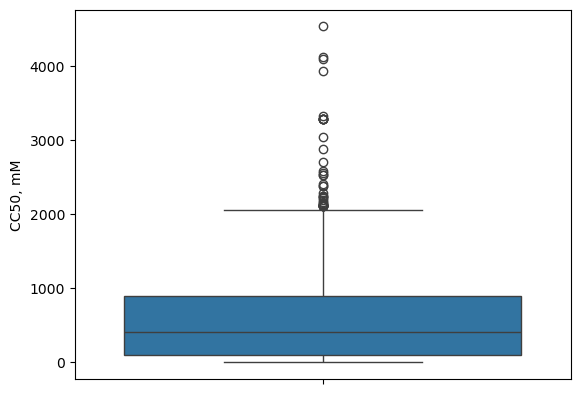

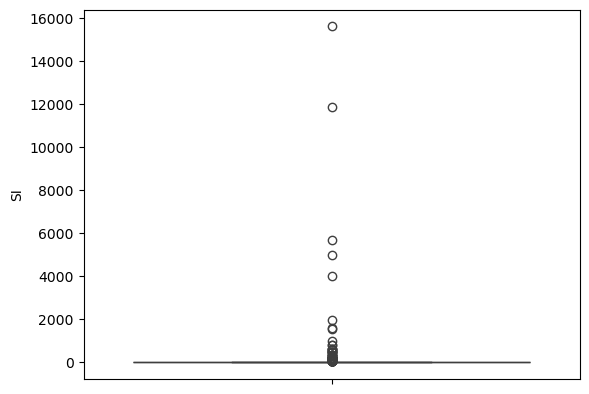

In [31]:
sns.boxplot(data=data, y="IC50, mM")
plt.show()

sns.boxplot(data=data, y="CC50, mM")
plt.show()

sns.boxplot(data=data, y="SI")
plt.show()

В целевых переменных достаточно много выбросов, поэтому удалим их с помощью IQR.

In [34]:
Q1_ic = data["IC50, mM"].quantile(0.25)
Q3_ic = data["IC50, mM"].quantile(0.75)
IQR_ic = Q3_ic - Q1_ic
Q1_cc = data["CC50, mM"].quantile(0.25)
Q3_cc = data["CC50, mM"].quantile(0.75)
IQR_cc = Q3_cc - Q1_cc
Q1_si = data["SI"].quantile(0.25)
Q3_si = data["SI"].quantile(0.75)
IQR_si = Q3_si - Q1_si

lower_bound_ic = Q1_ic - 1.5 * IQR_ic
upper_bound_ic = Q3_ic + 1.5 * IQR_ic
lower_bound_cc = Q1_cc - 1.5 * IQR_cc
upper_bound_cc = Q3_cc + 1.5 * IQR_cc
lower_bound_si = Q1_si - 1.5 * IQR_si
upper_bound_si = Q3_si + 1.5 * IQR_si

print(f"Выбросы ниже {lower_bound_ic:.2f} и выше {upper_bound_ic:.2f}")
print(f"Выбросы ниже {lower_bound_cc:.2f} и выше {upper_bound_cc:.2f}")
print(f"Выбросы ниже {lower_bound_si:.2f} и выше {upper_bound_si:.2f}")

Выбросы ниже -306.18 и выше 543.67
Выбросы ниже -1091.14 и выше 2085.22
Выбросы ниже -21.27 и выше 39.27


In [36]:
outliers_ic = data[(data['IC50, mM'] < lower_bound_ic) | (data['IC50, mM'] > upper_bound_ic)].index
outliers_cc = data[(data['CC50, mM'] < lower_bound_cc) | (data['CC50, mM'] > upper_bound_cc)].index
outliers_si = data[(data['SI'] < lower_bound_si) | (data['SI'] > upper_bound_si)].index

data = data.drop(outliers_ic, errors = 'ignore')
data = data.drop(outliers_cc, errors = 'ignore')
data= data.drop(outliers_si, errors = 'ignore')

Посмотрим на распределение целевых переменных еще раз.

(array([0.0137366 , 0.00655845, 0.00335669, 0.00402803, 0.00103283,
        0.00098119, 0.00103283, 0.00092954, 0.0006197 , 0.00046477,
        0.00067134, 0.00118775, 0.00041313, 0.00046477, 0.00025821,
        0.00020657, 0.00041313, 0.00025821, 0.00041313, 0.00015492]),
 array([1.08830298e-01, 2.70037177e+01, 5.38986051e+01, 8.07934925e+01,
        1.07688380e+02, 1.34583267e+02, 1.61478155e+02, 1.88373042e+02,
        2.15267929e+02, 2.42162817e+02, 2.69057704e+02, 2.95952592e+02,
        3.22847479e+02, 3.49742366e+02, 3.76637254e+02, 4.03532141e+02,
        4.30427028e+02, 4.57321916e+02, 4.84216803e+02, 5.11111691e+02,
        5.38006578e+02]),
 <BarContainer object of 20 artists>)

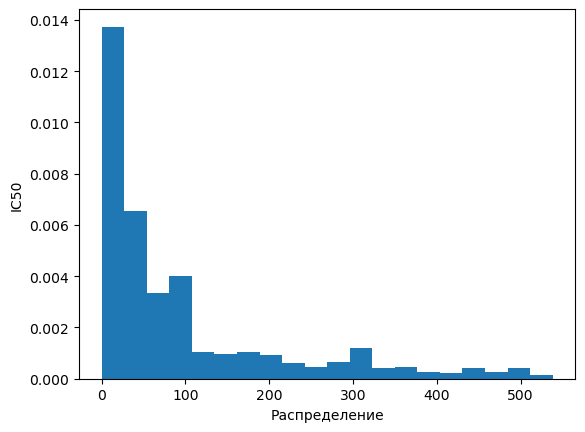

In [39]:
plt.xlabel('Распределение')
plt.ylabel('IC50')
plt.hist(x=data['IC50, mM'], bins=20, density=True)

(array([3.39562319e-03, 1.29955949e-03, 7.26635415e-04, 7.54582931e-04,
        4.75107771e-04, 7.26635415e-04, 5.17029045e-04, 3.63317707e-04,
        5.31002803e-04, 3.49343949e-04, 2.79475160e-04, 1.39737580e-04,
        1.25763822e-04, 8.38425479e-05, 5.58950319e-05, 2.79475160e-05,
        2.79475160e-05, 6.98687899e-05, 5.58950319e-05, 5.58950319e-05]),
 array([7.00807913e-01, 1.00093462e+02, 1.99486116e+02, 2.98878769e+02,
        3.98271423e+02, 4.97664077e+02, 5.97056731e+02, 6.96449384e+02,
        7.95842038e+02, 8.95234692e+02, 9.94627346e+02, 1.09402000e+03,
        1.19341265e+03, 1.29280531e+03, 1.39219796e+03, 1.49159061e+03,
        1.59098327e+03, 1.69037592e+03, 1.78976858e+03, 1.88916123e+03,
        1.98855388e+03]),
 <BarContainer object of 20 artists>)

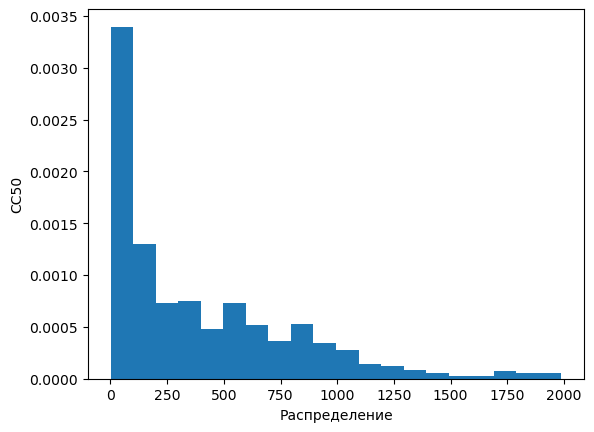

In [41]:
plt.xlabel('Распределение')
plt.ylabel('CC50')
plt.hist(x=data['CC50, mM'], bins=20, density=True)

(array([0.13031092, 0.12739894, 0.05241556, 0.04367964, 0.02183982,
        0.02111182, 0.01674386, 0.01528787, 0.01091991, 0.01019192,
        0.00727994, 0.00946392, 0.01019192, 0.00727994, 0.00655195,
        0.00800793, 0.00582395, 0.00800793, 0.00655195, 0.00509596]),
 array([1.14892695e-02, 1.91931952e+00, 3.82714976e+00, 5.73498001e+00,
        7.64281026e+00, 9.55064051e+00, 1.14584708e+01, 1.33663010e+01,
        1.52741312e+01, 1.71819615e+01, 1.90897917e+01, 2.09976220e+01,
        2.29054522e+01, 2.48132825e+01, 2.67211127e+01, 2.86289430e+01,
        3.05367732e+01, 3.24446035e+01, 3.43524337e+01, 3.62602640e+01,
        3.81680942e+01]),
 <BarContainer object of 20 artists>)

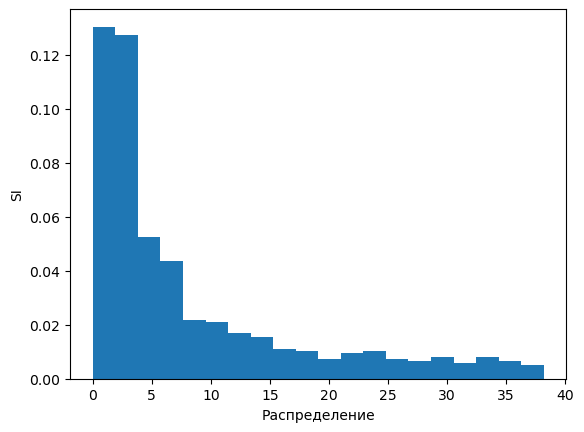

In [43]:
plt.xlabel('Распределение')
plt.ylabel('SI')
plt.hist(x=data['SI'], bins=20, density=True)

Данные по-прежнему распределены ненормально, к тому же, у них большой разброс - необходимо применить логарифмирование, чтобы алгоритмы лучше обрабатывали данные. Также, исходя из поставленных задач, нам необходимо заранее обозначить данные для классификации: медианы целевых переменных и SI < 8. Последний пункт необходимо сделать до логарифмирования, иначе необходимые показатели исказятся.

In [46]:
si_cl_8 = (data['SI'] > 8).astype(int)

In [48]:
si_cl_8.value_counts()

SI
0    495
1    225
Name: count, dtype: int64

In [51]:
data["log_IC50"] = np.log10(data["IC50, mM"] + 1e-6)
data['log_CC50'] = np.log10(data['CC50, mM'] + 1e-6)
data['log_SI'] = np.log10(data['SI'] + 1e-6)

Посмотрим на целевые переменные еще раз.

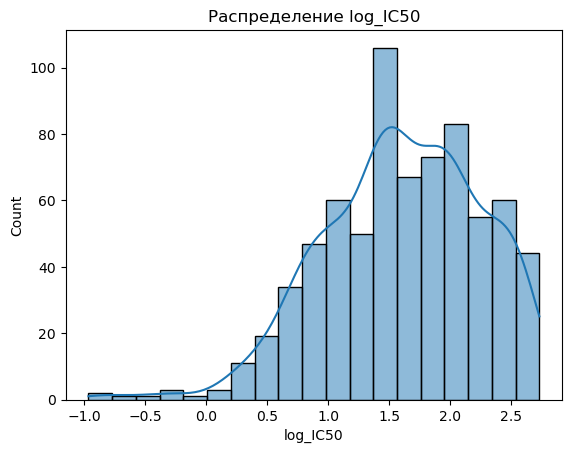

In [54]:
sns.histplot(data['log_IC50'], kde=True)
plt.title("Распределение log_IC50")
plt.show()

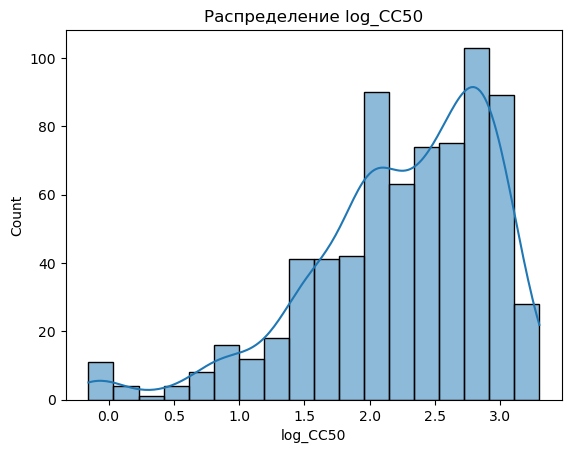

In [56]:
sns.histplot(data['log_CC50'], kde=True)
plt.title("Распределение log_CC50")
plt.show()

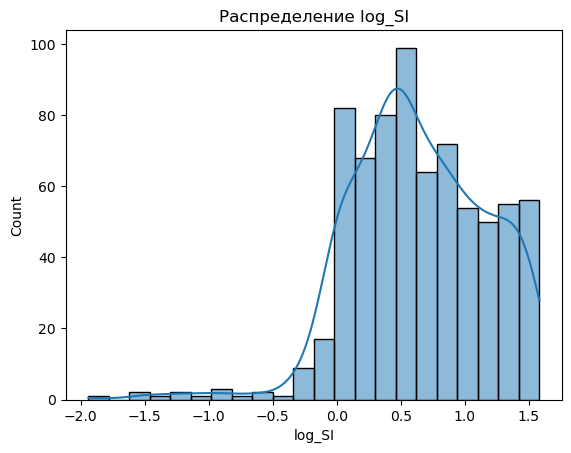

In [58]:
sns.histplot(data['log_SI'], kde=True)
plt.title("Распределение log_SI")
plt.show()

Распределение изменилось, поэтому теперь мы можем двигаться к извлечению медиан и задаче выбора лучших признаков, так как на данный момент их очень много - более 200 - вряд ли все из них будут информативны. Для отбора признаков будем использовать SelectKBest.

In [61]:
median_ic50 = data['log_IC50'].median()  #получаем медианы целевых признаков, создаем для них целевые показатели. Удаляем старые признаки из датасета
median_cc50 = data['log_CC50'].median()
median_si = data['log_SI'].median()

Y_ic = data["log_IC50"] 
Y_cc = data["log_CC50"]
Y_si = data["log_SI"]

ic50_cl = (Y_ic > median_ic50).astype(int)
cc50_cl = (Y_cc > median_cc50).astype(int)
si_cl = (Y_si > median_si).astype(int)
si_cl_8 = (Y_si > 8).astype(int)

X = data.drop(columns=["IC50, mM", "CC50, mM", "SI", "log_IC50", "log_CC50", "log_SI"])

Признаки будем выбирать отдельно для каждой целевой переменной. Отбирать будем по 50 признаков.

In [64]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

selector_ic = SelectKBest(score_func=mutual_info_regression, k=50) 
X_selected_ic = selector_ic.fit(X, Y_ic)

selected_features = X.columns[selector_ic.get_support()]
X_selected_ic = X[selected_features]

In [66]:
selector_cc = SelectKBest(score_func=mutual_info_regression, k=50)
X_selected_cc = selector_cc.fit(X, Y_cc)

selected_features_2 = X.columns[selector_cc.get_support()]
X_selected_cc = X[selected_features_2]

In [68]:
selector_si = SelectKBest(score_func=mutual_info_regression, k=50)
X_selected_si = selector_si.fit(X, Y_si)

selected_features_3 = X.columns[selector_si.get_support()]
X_selected_si = X[selected_features_3]

Используем VarianceThreshold для отбора более информативных признаков.

In [71]:
from sklearn.feature_selection import VarianceThreshold

var_ic = VarianceThreshold(threshold=0.01)
X_new_ic = X_selected_ic.loc[:, var_ic.fit(X_selected_ic).get_support()]
var_cc = VarianceThreshold(threshold=0.01)
X_new_cc = X_selected_cc.loc[:, var_cc.fit(X_selected_cc).get_support()]
var_si = VarianceThreshold(threshold=0.01)
X_new_si = X_selected_si.loc[:, var_si.fit(X_selected_si).get_support()]

In [73]:
X_new_ic = pd.DataFrame(X_new_ic)
X_new_cc = pd.DataFrame(X_new_cc)
X_new_si = pd.DataFrame(X_new_si)

In [ ]:
feature_names_ic = X_new_ic.columns
feature_names_cc = X_new_cc.columns
feature_names_si = X_new_si.columns

Стандартизируем наши датасеты по задачам и разделим их на тренировочную и тестовую выборки.

In [76]:
from sklearn.preprocessing import StandardScaler

scaler_ic = StandardScaler()
X_new_ic = scaler_ic.fit_transform(X_new_ic)
X_new_ic = pd.DataFrame(X_new_ic, columns=feature_names_ic)

scaler_cc = StandardScaler()
X_new_cc = scaler_cc.fit_transform(X_new_cc)
X_new_cc = pd.DataFrame(X_new_cc, columns=feature_names_cc)

scaler_si = StandardScaler()
X_new_si = scaler_si.fit_transform(X_new_si)
X_new_ic = pd.DataFrame(X_new_si, columns=feature_names_si)

In [78]:
from sklearn.model_selection import train_test_split

X_train_ic, X_test_ic, y_train_ic, y_test_ic = train_test_split(X_new_ic, Y_ic, test_size=0.3)
X_train_cc, X_test_cc, y_train_cc, y_test_cc = train_test_split(X_new_cc, Y_cc, test_size=0.3)
X_train_si, X_test_si, y_train_si, y_test_si = train_test_split(X_new_si, Y_si, test_size=0.3)

X_train_class_ic, X_test_class_ic, y_train_class_ic, y_test_class_ic = train_test_split(X_new_ic, ic50_cl, test_size=0.3, stratify = ic50_cl, random_state = 42)
X_train_class_cc, X_test_class_cc, y_train_class_cc, y_test_class_cc = train_test_split(X_new_cc, cc50_cl, test_size=0.3, stratify = cc50_cl, random_state = 42)
X_train_class_si, X_test_class_si, y_train_class_si, y_test_class_si = train_test_split(X_new_si, si_cl, test_size=0.3, stratify = si_cl, random_state = 42)
X_train_class_si8, X_test_class_si8, y_train_class_si_8, y_test_class_si_8 = train_test_split(X_new_si, si_cl_8, test_size=0.3, stratify = si_cl_8, random_state = 42)

После проделанной работы у нас оказалось несколько более маленьких датасетов из исходного большого, отдельно для каждой из задач:
    - Регрессия для IC50
    - Регрессия для CC50
    - Регрессия для SI
    - Классификация: превышает ли значение IC50 медианное значение выборки
    - Классификация: превышает ли значение CC50 медианное значение выборки
    - Классификация: превышает ли значение SI медианное значение выборки
    - Классификация: превышает ли значение SI значение 8

Они очищены от выбросов, дубликатов, пропущенных значений. Целевые переменные логарифмированы, признаки стандартизированы, отобраны 50 самых информативных признаков для каждого из созданных датасетов. Обозначены медианы и Si > 8 для задач классификации. Данный EDA полностью подготовил данные к применению различных алгоритмов и обработал данные надлежащим образом, чтобы избавиться от большого разброса и других аномалий, которые могут внести шум в данные.